**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_nuc", 
    "fcc_astarr_macs"
)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_gc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150042     12


#1_usercol,2_usercol,3_usercol,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,11_num_oth,12_seq_len
chr1,10038,10405,0.476839,0.523161,122,192,0,53,0,0,367
chr1,14282,14614,0.421687,0.578313,65,102,90,75,0,0,332
chr1,16025,16338,0.412141,0.587859,62,89,95,67,0,0,313


In [8]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.encode_chromatin_states.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

lst = split(dat, dat$Group)
dat = lst[["cCREs"]]

dat_region_annot_ccres = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 193629      6


Chrom,ChromStart,ChromEnd,Region,Group,Label
chr1,10038,10405,chr1:10038-10405,cCREs,Low-DNase
chr1,16025,16338,chr1:16025-16338,cCREs,Low-DNase
chr1,17288,17689,chr1:17288-17689,cCREs,Low-DNase


In [18]:
tmp = dat_region_gc
tmp = tmp %>% dplyr::select(
    `#1_usercol`,
    `2_usercol`,
    `3_usercol`,
    `5_pct_gc`,
    `12_seq_len`
)
colnames(tmp) = c("Chrom", "ChromStart", "ChromEnd", "pGC", "Length")
head(tmp)

Chrom,ChromStart,ChromEnd,pGC,Length
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367
chr1,14282,14614,0.578313,332
chr1,16025,16338,0.587859,313
chr1,17288,17689,0.625935,401
chr1,28934,29499,0.771681,565
chr1,115429,115969,0.381481,540


In [19]:
dat = dat_region_annot_ccres
dat = dat %>% dplyr::left_join(tmp, by = c("Chrom", "ChromStart", "ChromEnd"))
head(dat)

Chrom,ChromStart,ChromEnd,Region,Group,Label,pGC,Length
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,cCREs,Low-DNase,0.523161,367
chr1,16025,16338,chr1:16025-16338,cCREs,Low-DNase,0.587859,313
chr1,17288,17689,chr1:17288-17689,cCREs,Low-DNase,0.625935,401
chr1,28934,29499,chr1:28934-29499,cCREs,Low-DNase,0.771681,565
chr1,115429,115969,chr1:115429-115969,cCREs,CA-CTCF,0.381481,540
chr1,136201,137353,chr1:136201-137353,cCREs,Low-DNase,0.694444,1152


In [24]:
tmp = dat 
tmp = tmp %>% 
    dplyr::group_by(Label) %>% 
    dplyr::summarise(pGC=mean(pGC)) %>% 
    dplyr::arrange(pGC)

tmp

Label,pGC
<chr>,<dbl>
dELS,0.4889828
CA-TF,0.4930378
CA-CTCF,0.5105088
CA-only,0.5209320
Low-DNase,0.5335020
pELS,0.5936917
PLS,0.6227318
CA-H3K4me3,0.6385777


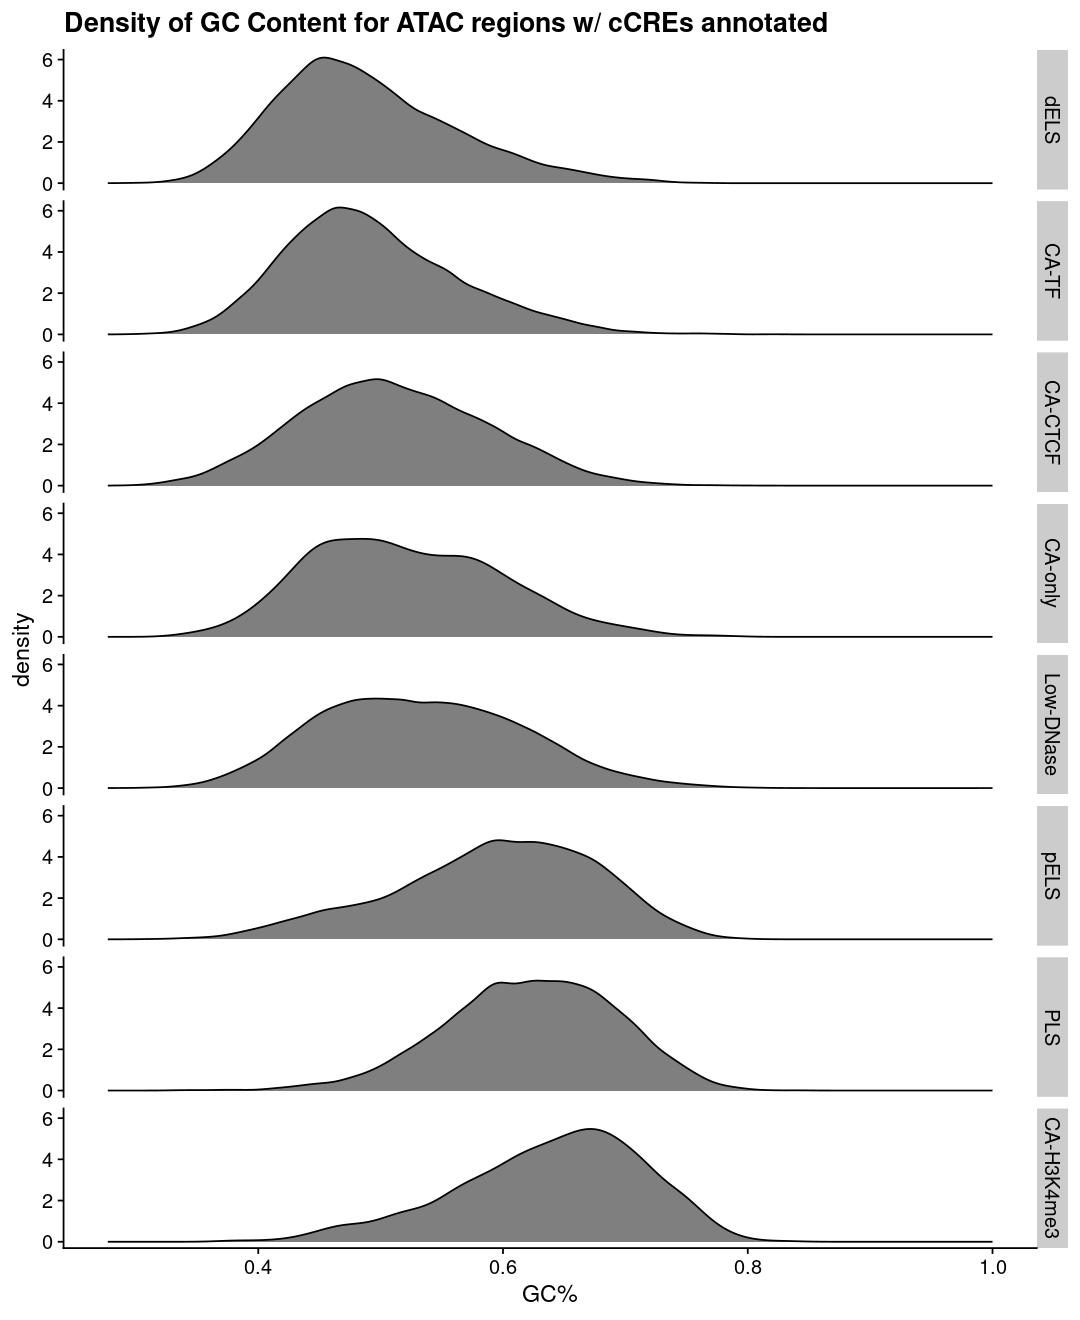

In [27]:
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=tmp$Label))

gpt = ggplot(dat, aes(x=pGC)) + 
    geom_density(fill = "grey50") + 
    labs(x = "GC%", title = "Density of GC Content for ATAC regions w/ cCREs annotated") +
    theme_cowplot() +
    facet_grid(Label~.)

options(repr.plot.height = 11, repr.plot.width=9)
print(gpt)